# Final Project: Prediction of  Price

The aim of this project is to create a regression model based on the vehicle Price Dataset. 
This model will predict the price of a vehicle.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

### Import data

In [2]:
df = pd.read_csv('data/autos.csv')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.shape

(371528, 20)

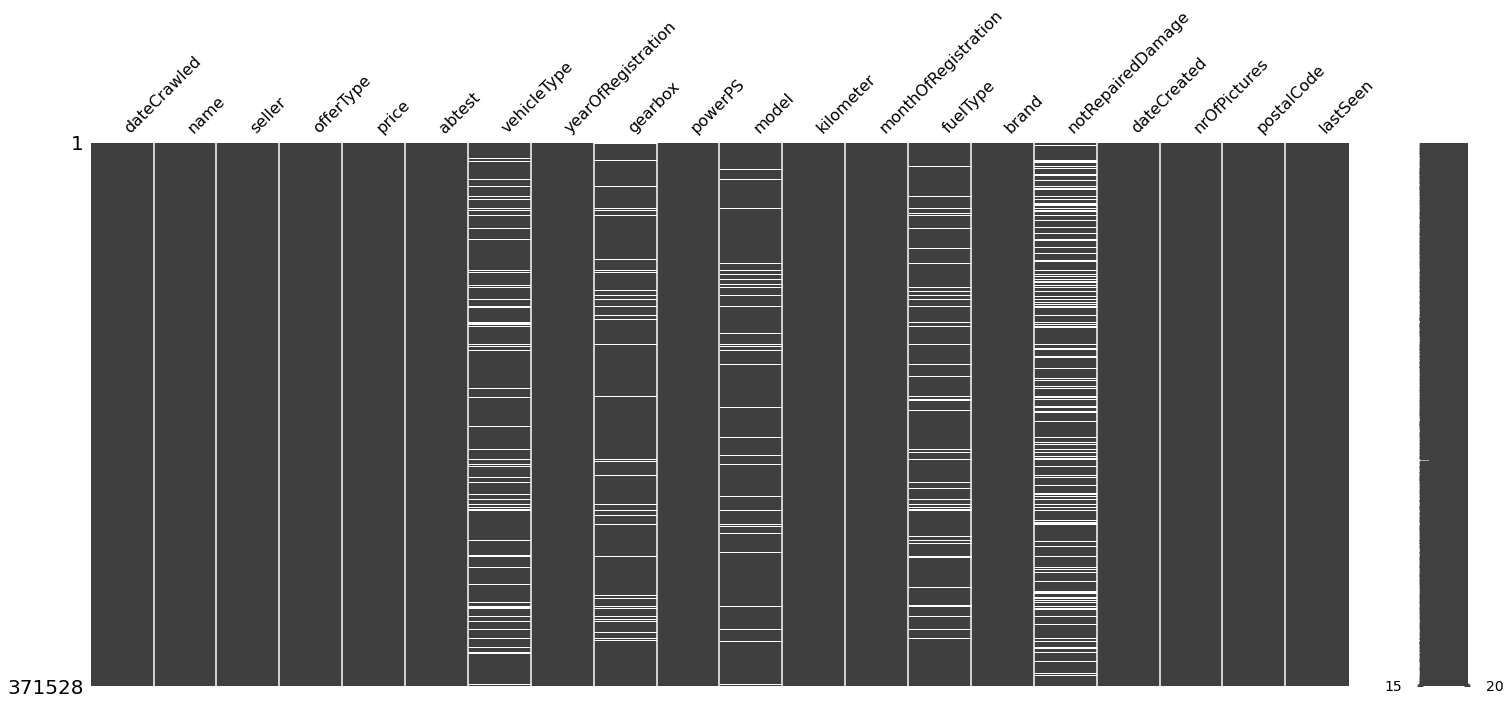

In [4]:
msno.matrix(df);

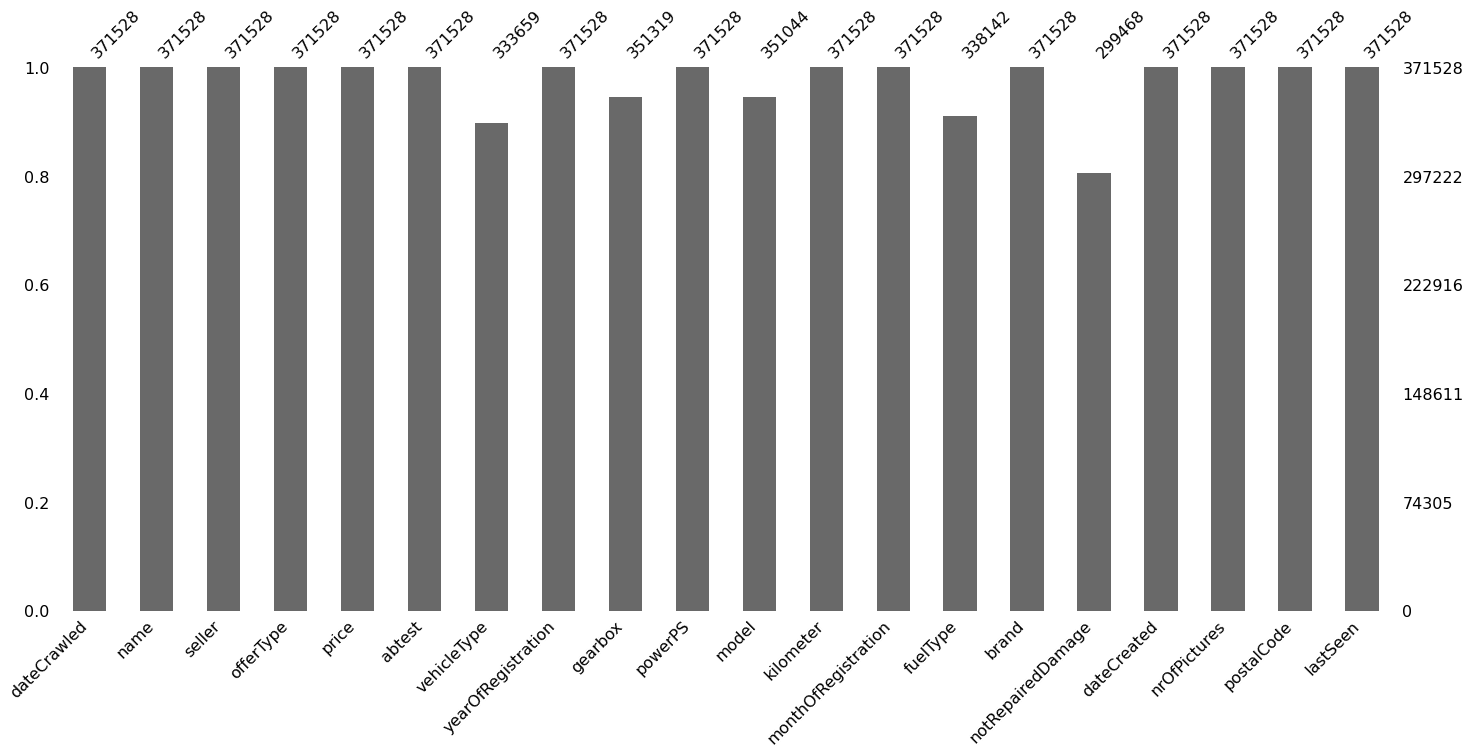

In [5]:
msno.bar(df);

In [6]:
#info() is used to get the basic info of the data set, like null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [7]:
#describe() tells the statistics of the data
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [8]:
df.dropna(inplace=True)

### Data Cleaning and EDA

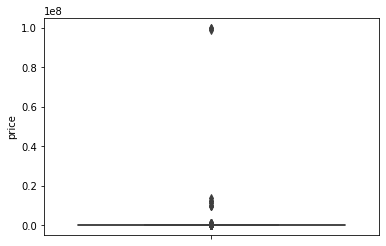

In [9]:
# price
sns.boxplot(y='price',data=df);


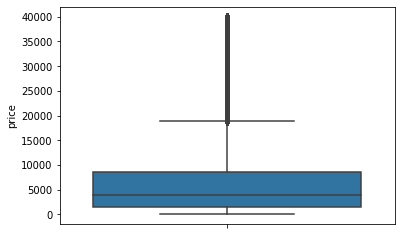

In [10]:
# Remove outliers from the price 
df = df.drop(df[(df["price"]>40000)].index)
df = df.drop(df[(df["price"]<10)].index)
sns.boxplot(y='price',data=df);


<AxesSubplot:xlabel='price', ylabel='Density'>

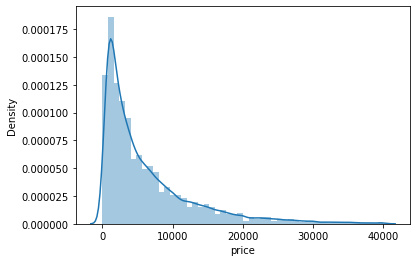

In [11]:
sns.distplot(df['price'],hist=True)


In [12]:
df.shape

(255004, 20)

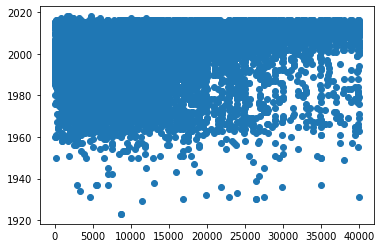

In [13]:
#making sure there is no anyother outlier
plt.scatter(df['price'],df['yearOfRegistration']);

#### Convert dateCrawed to day

In [14]:
df["dateCrawled"]=df.dateCrawled.str[8:10].astype(int)


In [15]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,17,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,31,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,4,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,1,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
10,26,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34


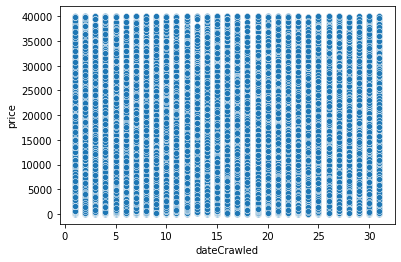

In [16]:
sns.scatterplot(x='dateCrawled',y='price',data=df);


In [17]:
df.drop("dateCrawled", axis = 1, inplace = True)


##### Remove name

In [18]:
df.drop("name", axis = 1, inplace = True)

#### seller

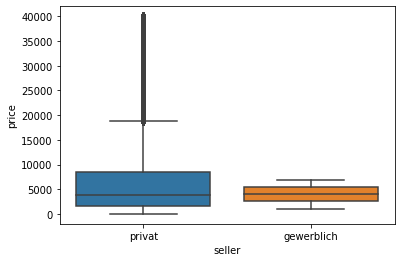

In [19]:
#checking relationship
sns.boxplot(x='seller', y='price',data=df);


####  offerType

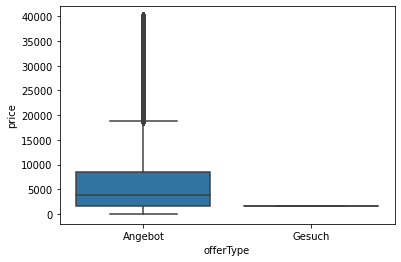

In [20]:
sns.boxplot(x='offerType', y='price',data=df);


#### abtest

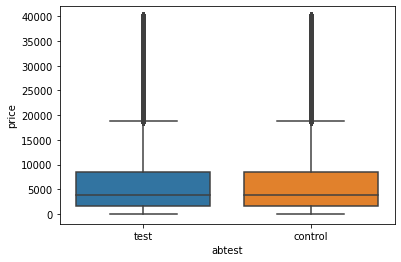

In [21]:
sns.boxplot(x='abtest', y='price',data=df);


In [22]:
# these distributions are similar eachother, so remove
df.drop("abtest", axis = 1, inplace = True)


#### vehicleType

In [23]:
df['vehicleType'].describe()

count        255004
unique            8
top       limousine
freq          74931
Name: vehicleType, dtype: object

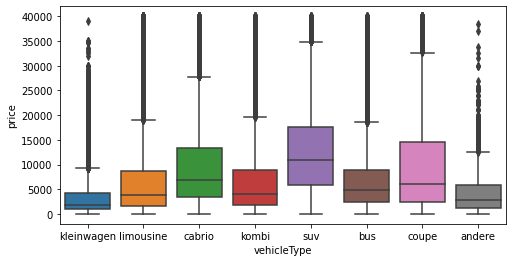

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(x='vehicleType', y='price',data=df);


#### yearOfRegistration

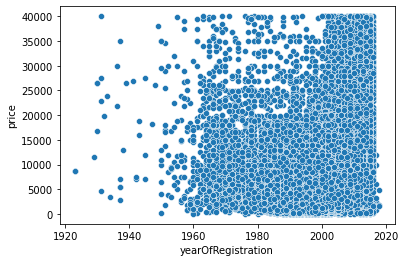

In [25]:
sns.scatterplot(x='yearOfRegistration',y='price',data=df);


In [26]:
df.yearOfRegistration[df.yearOfRegistration<1900]=min(df.yearOfRegistration[df.yearOfRegistration>1900])
df.yearOfRegistration[df.yearOfRegistration>2020]=max(df.yearOfRegistration[df.yearOfRegistration<2020])


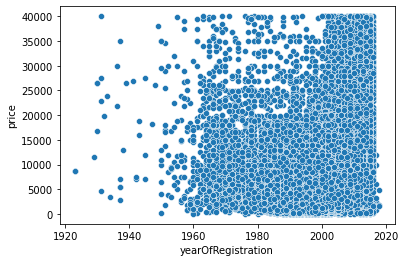

In [27]:
sns.scatterplot(x='yearOfRegistration',y='price',data=df);


#### gearbox

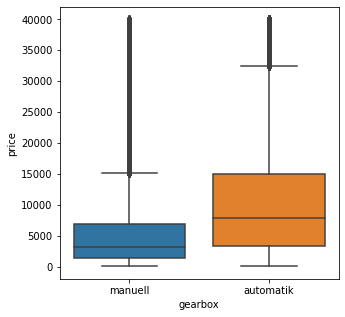

In [28]:
plt.figure(figsize=(5,5))

sns.boxplot(x='gearbox', y='price',data=df);


#### powerPS

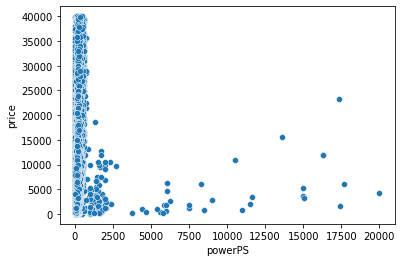

In [29]:
sns.scatterplot(x='powerPS',y='price',data=df);


#### model

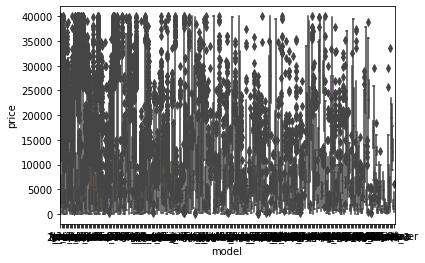

In [30]:
df["model"] = df["model"].fillna("others")
sns.boxplot(x='model', y='price',data=df);


In [31]:
# Top 20 models in this dataset is choosen
famous_models = df['model'].value_counts().keys()[:21]

#If the model is not in the list of famous_models it is categorized as others
df['model'] =  [model if model in famous_models else 'others' for model in df['model']]

#### Drop monthOfRegistration

In [32]:
# drop
df.drop("monthOfRegistration", axis = 1, inplace = True)


#### kilometer

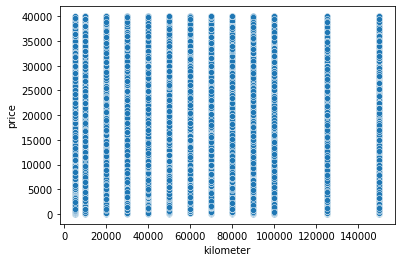

In [33]:
sns.scatterplot(x='kilometer',y='price',data=df);


In [34]:
# drop
# df.drop("kilometer", axis = 1, inplace = True)


#### fuelType

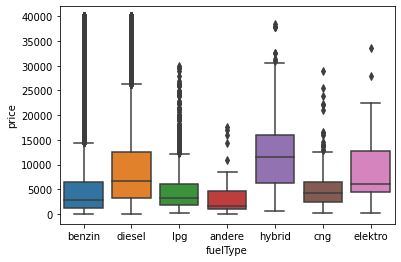

In [35]:
df["fuelType"] = df["fuelType"].fillna("None")
sns.boxplot(x='fuelType', y='price',data=df);


In [36]:
df.drop("fuelType", axis = 1, inplace = True)

In [37]:
#### brand

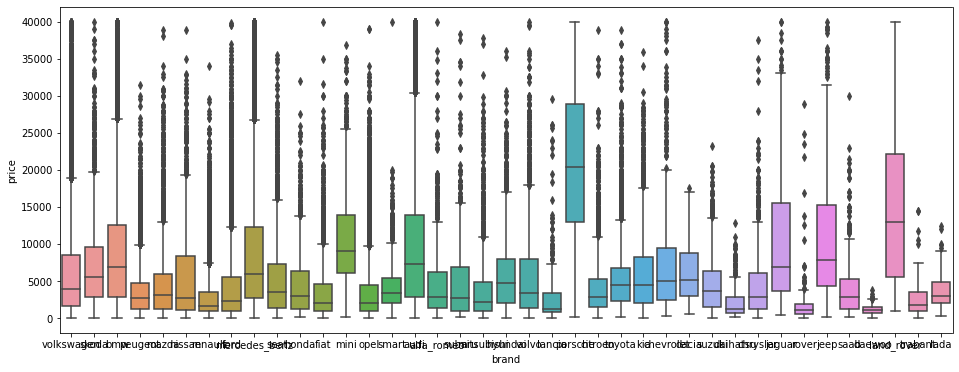

In [38]:
plt.figure(figsize=(16,6))
sns.boxplot(x='brand', y='price',data=df);


In [39]:
# drop
df.drop("brand", axis = 1, inplace = True)


#### notRepairedDamage

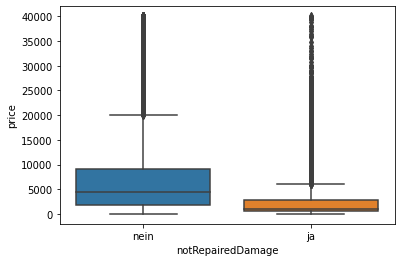

In [40]:
df["notRepairedDamage"] = df["notRepairedDamage"].fillna("None")
sns.boxplot(x='notRepairedDamage', y='price',data=df);


#### nrOfPictures

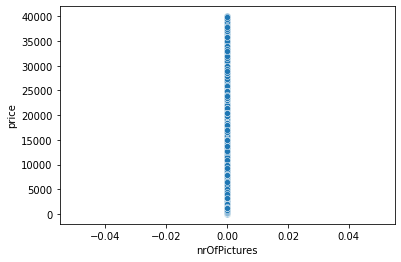

In [41]:
sns.scatterplot(x='nrOfPictures',y='price',data=df);


In [42]:
df.drop("nrOfPictures", axis = 1, inplace = True)


#### postalCode

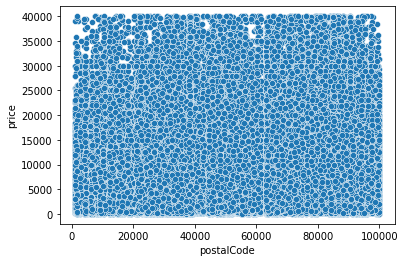

In [43]:
sns.scatterplot(x='postalCode', y='price',data=df);


In [44]:
df.drop("postalCode", axis = 1, inplace = True)


#### lastSeen

In [45]:
df.drop("lastSeen", axis = 1, inplace = True)


#### dateCreated

In [46]:
# df["dateCreated"]=df.dateCreated.str[8:10].astype(int)
# df.head()

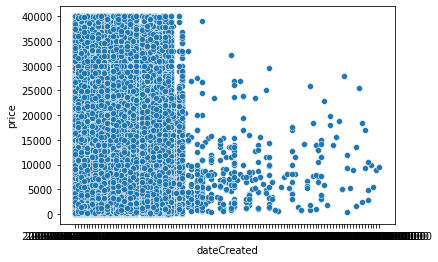

In [47]:
sns.scatterplot(x='dateCreated', y='price',data=df);

In [48]:
df.drop("dateCreated", axis = 1, inplace = True)


## Feature Engineering


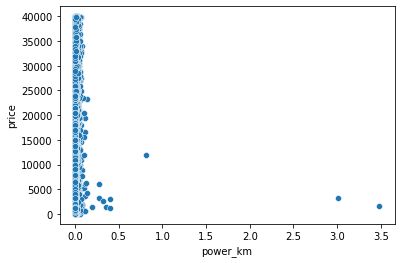

In [49]:
# power per kilometer
df['power_km']=df['powerPS']/df['kilometer']
sns.scatterplot(x='power_km',y='price',data=df);


In [50]:
# df.drop("kilometer", axis = 1, inplace = True)
df.drop("powerPS", axis = 1, inplace = True)
df.head(5)

,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,model,kilometer,notRepairedDamage,power_km
3,privat,Angebot,1500,kleinwagen,2001,manuell,golf,150000,nein,0.000500
4,privat,Angebot,3600,kleinwagen,2008,manuell,others,90000,nein,0.000767
5,privat,Angebot,650,limousine,1995,manuell,3er,150000,ja,0.000680
6,privat,Angebot,2200,cabrio,2004,manuell,2_reihe,150000,nein,0.000727
10,privat,Angebot,2000,limousine,2004,manuell,others,150000,nein,0.000700


In [51]:
df.isnull().sum()

seller                0
offerType             0
price                 0
vehicleType           0
yearOfRegistration    0
gearbox               0
model                 0
kilometer             0
notRepairedDamage     0
power_km              0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255004 entries, 3 to 371527
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   seller              255004 non-null  object 
 1   offerType           255004 non-null  object 
 2   price               255004 non-null  int64  
 3   vehicleType         255004 non-null  object 
 4   yearOfRegistration  255004 non-null  int64  
 5   gearbox             255004 non-null  object 
 6   model               255004 non-null  object 
 7   kilometer           255004 non-null  int64  
 8   notRepairedDamage   255004 non-null  object 
 9   power_km            255004 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 29.5+ MB


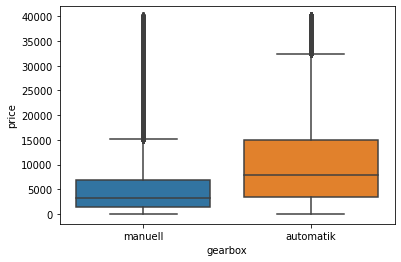

In [53]:
sns.boxplot(x='gearbox', y='price',data=df);


In [54]:
df.groupby('gearbox').mean()

,price,yearOfRegistration,kilometer,power_km
gearbox,,,,
automatik,10321.638716,2004.539617,122771.427111,0.002003
manuell,5094.822083,2002.979476,125027.610097,0.001308


## arget and features

In [55]:
y=df["price"]
X=df[['vehicleType','yearOfRegistration','model','kilometer','gearbox']]
# X.drop("price", axis = 1, inplace = True)
X.head()

,vehicleType,yearOfRegistration,model,kilometer,gearbox
3,kleinwagen,2001,golf,150000,manuell
4,kleinwagen,2008,others,90000,manuell
5,limousine,1995,3er,150000,manuell
6,cabrio,2004,2_reihe,150000,manuell
10,limousine,2004,others,150000,manuell


In [56]:
df['vehicleType'].value_counts()

limousine     74931
kleinwagen    58154
kombi         52483
bus           24582
cabrio        17865
coupe         13689
suv           11624
andere         1676
Name: vehicleType, dtype: int64

In [57]:
df['model'].value_counts()

others         102758
golf            20586
andere          19503
3er             15347
polo             8660
corsa            8132
a4               7722
astra            7525
passat           7441
c_klasse         6788
5er              6733
e_klasse         5828
a3               4902
a6               4643
focus            4408
fiesta           3955
transporter      3937
2_reihe          3800
1er              3344
a_klasse         3079
twingo           3038
fortwo           2875
Name: model, dtype: int64

### Dummify

In [58]:
# #Columns to be dummified
temp=['vehicleType', 'model','gearbox']
# #Assigning the data to X after dummification
X = pd.get_dummies(data=X, columns=temp)
X.head()

,yearOfRegistration,kilometer,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,...,model_focus,model_fortwo,model_golf,model_others,model_passat,model_polo,model_transporter,model_twingo,gearbox_automatik,gearbox_manuell
3,2001,150000,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2008,90000,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,1995,150000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,2004,150000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,2004,150000,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [59]:
#from sklearn.preprocessing import LabelEncoder
#LE = LabelEncoder()

#Encoding the columns with Object type
#for col in X.columns[:]:
#    if X[col].dtype == 'object':
#        X[col] = LE.fit_transform(X[col])
#        df[col+'_encoded'] = X[col][:]

In [60]:
df1=pd.DataFrame(data=X)

In [61]:
df1.columns

Index(['yearOfRegistration', 'kilometer', 'vehicleType_andere',
       'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe',
       'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine',
       'vehicleType_suv', 'model_1er', 'model_2_reihe', 'model_3er',
       'model_5er', 'model_a3', 'model_a4', 'model_a6', 'model_a_klasse',
       'model_andere', 'model_astra', 'model_c_klasse', 'model_corsa',
       'model_e_klasse', 'model_fiesta', 'model_focus', 'model_fortwo',
       'model_golf', 'model_others', 'model_passat', 'model_polo',
       'model_transporter', 'model_twingo', 'gearbox_automatik',
       'gearbox_manuell'],
      dtype='object')

In [62]:
df.columns

Index(['seller', 'offerType', 'price', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'model', 'kilometer', 'notRepairedDamage', 'power_km'],
      dtype='object')

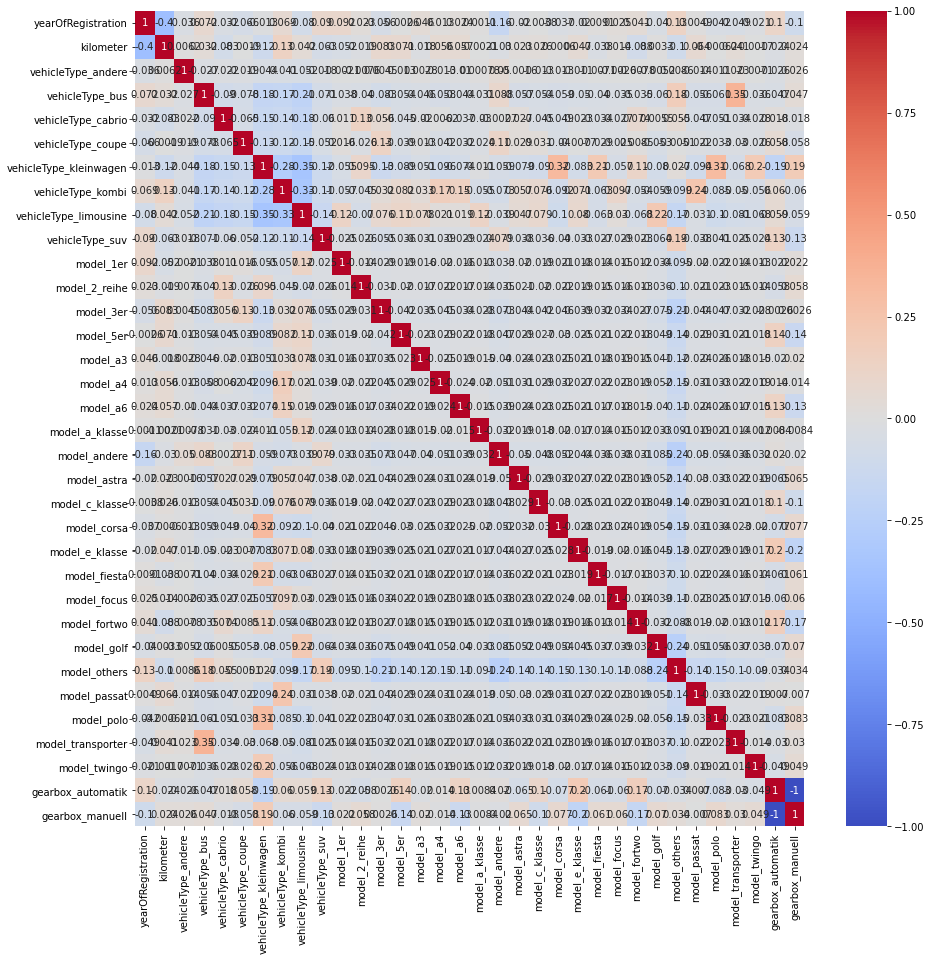

In [63]:
# heatmap
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm');

## Train Test split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.7)


## Linear Regression


In [65]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)


In [66]:
print(X_train.dtypes)

yearOfRegistration        int64
kilometer                 int64
vehicleType_andere        uint8
vehicleType_bus           uint8
vehicleType_cabrio        uint8
vehicleType_coupe         uint8
vehicleType_kleinwagen    uint8
vehicleType_kombi         uint8
vehicleType_limousine     uint8
vehicleType_suv           uint8
model_1er                 uint8
model_2_reihe             uint8
model_3er                 uint8
model_5er                 uint8
model_a3                  uint8
model_a4                  uint8
model_a6                  uint8
model_a_klasse            uint8
model_andere              uint8
model_astra               uint8
model_c_klasse            uint8
model_corsa               uint8
model_e_klasse            uint8
model_fiesta              uint8
model_focus               uint8
model_fortwo              uint8
model_golf                uint8
model_others              uint8
model_passat              uint8
model_polo                uint8
model_transporter         uint8
model_tw

In [67]:
# RMSE on training and testing sets.
lr_mse_train = mean_squared_error(y_true = y_train,y_pred = lr.predict(X_train))
lr_mse_test  = mean_squared_error(y_true = y_test, y_pred = lr.predict(X_test))
print("RMSE of Multiple linear regression for train data: %f"%lr_mse_train**0.5)
print("RMSE of Multiple linear regression for test  data: %f"%lr_mse_test**0.5)

RMSE of Multiple linear regression for train data: 4418.741934
RMSE of Multiple linear regression for test  data: 4463.848410


In [68]:
#R2 score trainig
lr.score(X_train,y_train)

0.5621256572294664

In [69]:
#R2 score testing
lr.score(X_test,y_test)

0.5582441948509025

## Ridge Regression

In [70]:
reg = Ridge(alpha= 1.0)
rsCV = RandomizedSearchCV(reg,cv= 5,param_distributions={'alpha':np.linspace(0,20,100)},random_state= 1)
rsCV.fit(X_train,y_train);


In [71]:
rr_mse_train = mean_squared_error(y_true = y_train,y_pred = rsCV.predict(X_train))
rr_mse_test  = mean_squared_error(y_true = y_test, y_pred = rsCV.predict(X_test))
print("RMSE of Ridge Regression for train data: %f"%rr_mse_train**0.5)
print("RMSE of Ridge Regression for test  data: %f"%rr_mse_test**0.5)


RMSE of Ridge Regression for train data: 4418.742387
RMSE of Ridge Regression for test  data: 4463.858770


In [72]:
#R2 score trainig
rsCV.score(X_train,y_train)

0.5621255674271695

In [73]:
#R2 score testing
rsCV.score(X_test,y_test)

0.5582421444510809

## Lasso Regression

In [74]:
lasso = Lasso(alpha= 1.0)
lsCV = RandomizedSearchCV(lasso,cv= 5,param_distributions={'alpha':np.linspace(0,20,100)},random_state= 1)
lsCV.fit(X_train,y_train);


In [75]:
ls_mse_train = mean_squared_error(y_true = y_train,y_pred = lsCV.predict(X_train))
ls_mse_test  = mean_squared_error(y_true = y_test, y_pred = lsCV.predict(X_test))
print("RMSE of Lasso regression for train data: %f"%ls_mse_train**0.5)
print("RMSE of Lasso regression for test  data: %f"%ls_mse_test**0.5)


RMSE of Lasso regression for train data: 4420.497998
RMSE of Lasso regression for test  data: 4465.954858


In [76]:
#R2 score trainig
lsCV.score(X_train,y_train)

0.561777554601908

In [77]:
#R2 score testing
lsCV.score(X_test,y_test)

0.5578271756810813

### k-nearest neighbors model

In [78]:
#from sklearn.neighbors import KNeighborsRegressor
#kr = KNeighborsRegressor()
#kr.fit(X_train, y_train)

In [79]:
#kr_mse_train = mean_squared_error(y_true = y_train,y_pred = kr.predict(X_train))
#kr_mse_test  = mean_squared_error(y_true = y_test, y_pred = kr.predict(X_test))
#print("RMSE of KNN for train data: %f"%kr_mse_train**0.5)
#print("RMSE of KNN for test  data: %f"%kr_mse_test**0.5)

# Output:
#RMSE of KNN for train data: 3465.356287
#RMSE of KNN for test  data: 3682.110154

In [80]:
#R2 score trainig
#kr.score(X_train,y_train)

# Output:
# 0.6978528328893174

In [81]:
#R2 score testing
#kr.score(X_test,y_test)

# Output:
#0.6596718422946977

## Decision tree

In [82]:
from sklearn.tree import DecisionTreeRegressor


In [83]:
dt= DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [84]:
print(X_train)

        yearOfRegistration  kilometer  vehicleType_andere  vehicleType_bus  \
370575                2016       5000                   0                0   
78730                 2006     150000                   0                0   
236255                1999     150000                   0                0   
244507                2001      90000                   0                0   
49242                 1995     150000                   0                0   
...                    ...        ...                 ...              ...   
174527                2012      40000                   0                0   
150993                2006      90000                   0                0   
192082                1999     150000                   0                0   
213917                2006     150000                   0                1   
177581                2003     150000                   0                0   

        vehicleType_cabrio  vehicleType_coupe  vehicleType_klei

In [85]:
dt_mse_train = mean_squared_error(y_true = y_train,y_pred = dt.predict(X_train))
dt_mse_test  = mean_squared_error(y_true = y_test, y_pred = dt.predict(X_test))
print("RMSE of decision tree for train data: %f"%dt_mse_train**0.5)
print("RMSE of decision tree for test  data: %f"%dt_mse_test**0.5)

RMSE of decision tree for train data: 2766.534164
RMSE of decision tree for test  data: 3425.860693


In [86]:
#R2 score trainig
dt.score(X_train,y_train)

0.8283577112037903

In [87]:
#R2 score testing
dt.score(X_test,y_test)

0.7398026985728016

## Bagged Decision Trees

In [88]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor()
br.fit(X_train, y_train)

BaggingRegressor()

In [89]:
br_mse_train = mean_squared_error(y_true = y_train,y_pred = br.predict(X_train))
br_mse_test  = mean_squared_error(y_true = y_test, y_pred = br.predict(X_test))
print("RMSE of Bagging Regressor for train data: %f"%br_mse_train**0.5)
print("RMSE of Bagging Regressorfor test  data: %f"%br_mse_test**0.5)

RMSE of Bagging Regressor for train data: 2820.881633
RMSE of Bagging Regressorfor test  data: 3296.046021


In [90]:
#R2 score trainig
br.score(X_train,y_train)

0.8215477829438227

In [91]:
#R2 score testing
br.score(X_test,y_test)

0.7591481849051491

## Random Forest Regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [93]:
rf_mse_train = mean_squared_error(y_true = y_train,y_pred = rf.predict(X_train))
rf_mse_test  = mean_squared_error(y_true = y_test, y_pred = rf.predict(X_test))
print("RMSE of Random Forest Regressor for train data: %f"%rf_mse_train**0.5)
print("RMSE of Random Forest Regressorfor test  data: %f"%rf_mse_test**0.5)

RMSE of Random Forest Regressor for train data: 2798.419019
RMSE of Random Forest Regressorfor test  data: 3277.083132


In [94]:
#R2 score trainig
rf.score(X_train,y_train)

0.8243784891013264

In [95]:
#R2 score testing
rf.score(X_test,y_test)

0.7619115614590501

## AdaBoost

In [96]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)

AdaBoostRegressor()

In [97]:
ab_mse_train = mean_squared_error(y_true = y_train,y_pred = ab.predict(X_train))
ab_mse_test  = mean_squared_error(y_true = y_test, y_pred = ab.predict(X_test))
print("RMSE of AdaBoost Regressor for train data: %f"%ab_mse_train**0.5)
print("RMSE of AdaBoost Regressorfor test  data: %f"%ab_mse_test**0.5)

RMSE of AdaBoost Regressor for train data: 4565.396401
RMSE of AdaBoost Regressorfor test  data: 4592.472871


In [98]:
#R2 score trainig
ab.score(X_train,y_train)

0.5325779390546748

In [99]:
#R2 score testing
ab.score(X_test,y_test)

0.5324192871035138

## Gradient Boosting

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
ss = StandardScaler()

In [101]:
pipe_gb = Pipeline([('ss', ss),   ('gb', GradientBoostingRegressor())])
pipe_gb.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('gb', GradientBoostingRegressor())])

In [102]:
gb_mse_train = mean_squared_error(y_true = y_train,y_pred = pipe_gb.predict(X_train))
gb_mse_test  = mean_squared_error(y_true = y_test, y_pred = pipe_gb.predict(X_test))
print("RMSE of Gradient Boosting Regressor for train data: %f"%gb_mse_train**0.5)
print("RMSE of Gradient Boosting Regressorfor test  data: %f"%gb_mse_test**0.5)

RMSE of Gradient Boosting Regressor for train data: 3402.734060
RMSE of Gradient Boosting Regressorfor test  data: 3441.978002


In [103]:
#R2 score trainig
pipe_gb.score(X_train,y_train)

0.7403380955318895

In [104]:
#R2 score testing
pipe_gb.score(X_test,y_test)

0.7373486904635604

# Results

|Model	|Testing RMSE| R2 Training| R2 Testing|
| --- | ---| --- | ---|
|Linear Regression | 4463.84 |0.5621 | 0.5582 |
|Ridge Regression | 4463.85 |0.5621 | 0.5582 |
| Lasso Regression | 4465.95 |0.5617 | 0.5578 |
| k-Nearest Neighbors | 3682.11 |0.6978 |0.6596 |
| Decision Tree | 3425.86 |0.8283 | 0.7398 |
| Bagging Decision Trees | 3296.04 |0.8215 | 0.7591 |
| Random Forest | 3277.08 |0.8243 | 0.7619 |
| AdaBoost | 4592.47 |0.5325 | 0.5324 |
| Gradient Boosting | 3441.97 |0.7403 | 0.7373 |



## Show the Best Model

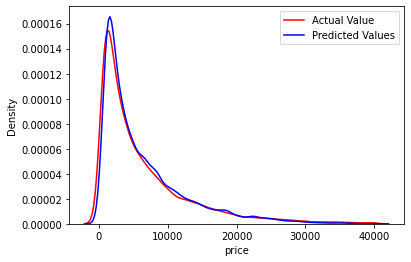

In [105]:
pred=dt.predict(X_test)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.legend();

In [106]:
import pickle
pickle.dump(rf,open('Random_Forest_cars.pkl','wb'))